# Simple Linear Regression -sklearn

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Splitting the dataset into the Training set and Test set

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [7]:

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

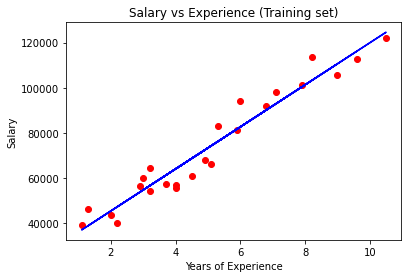

In [9]:
plt.scatter(X_train, y_train, color ='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

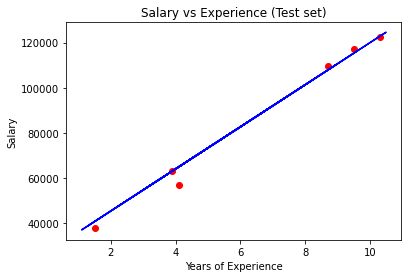

In [10]:
plt.scatter(X_test, y_test, color ='red')
plt.plot(X_train,regressor.predict(X_train), color='blue') # no need to replace, because it will same
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Making a single prediction (for example the salary of an employee with 12 years of experience 

In [11]:
salary_predict = regressor.predict([[12]])

In [12]:
print(salary_predict)

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$



## Getting the final linear regression equation with the values of the coefficients

In [13]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.099150628186


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

#  Simple Linear Regression - Statsmodel

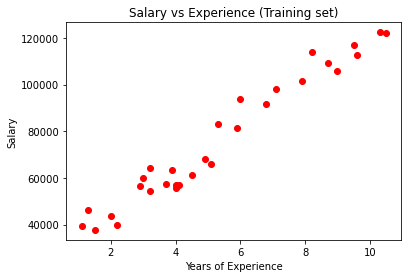

In [14]:
plt.scatter(X, y, color ='red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
X1=sm.add_constant(X)
results= sm.OLS(y,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.14e-20
Time:                        22:59:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

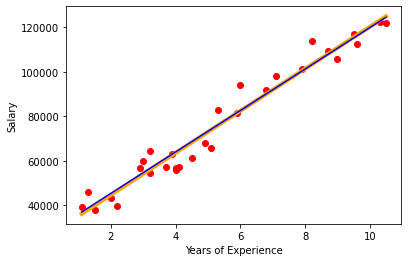

In [23]:
# Create a scatter plot
plt.scatter(X,y,color ='red')
# Define the regression equation, so we can plot it later
yhat = 9449.9623*X + 2.579e+04
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(X,yhat, lw=4, c='orange', label ='regression line')

# add the prediction from sklean library
plt.plot(X,regressor.predict(X), color='blue')

# Label the axes
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()